In [ ]:
# Install necessary packages (Uncomment if not installed)
!pip install xgboost scikit-learn pandas matplotlib seaborn

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/AmesHousing.csv")

In [ ]:
# Display first few rows
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
# Data Preprocessing
# Drop columns with excessive missing values (>30% missing)
missing_cols = df.columns[df.isnull().mean() > 0.3]
df.drop(columns=missing_cols, inplace=True)

In [ ]:
# Fill missing values with median (for numerical) or mode (for categorical)
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)


<ipython-input-8-9aa88950aa9e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-8-9aa88950aa9e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=["object"]):
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
# Remove outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Select features and target variable
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

In [ ]:
# Count total missing values in the dataset
print("Total missing values in the dataset:", df.isnull().sum().sum())


Total missing values in the dataset: 0


In [ ]:
# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train multiple models and compare performance
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel="rbf"),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
}


In [ ]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.404e+08, tolerance: 4.637e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
import pandas as pd # Add this line at the beginning of your script or cell

# Display results
results_df = pd.DataFrame(results).T
print(results_df)



                                    MAE           MSE          RMSE  R2 Score
Linear Regression           8600.546633  1.407450e+08  11863.597878  0.932369
Ridge Regression            8664.227600  1.424771e+08  11936.377399  0.931537
Lasso Regression            8600.650162  1.407551e+08  11864.025566  0.932364
Random Forest              10802.942742  2.408933e+08  15520.739039  0.884246
Support Vector Regression  32973.463815  2.122295e+09  46068.373984 -0.019806
XGBoost                    10366.320312  2.150800e+08  14665.607113  0.896650


In [ ]:
# Hyperparameter tuning for XGBoost
xgb_params = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300]
}
grid_search = GridSearchCV(XGBRegressor(objective="reg:squarederror"), xgb_params, cv=3, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [ ]:
# Best model from grid search
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

In [ ]:
# Final Evaluation
print("Best XGBoost Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2 Score:", r2_score(y_test, y_pred_xgb))


Best XGBoost Model Performance:
MAE: 9126.626953125
MSE: 160772416.0
RMSE: 12679.606303036384
R2 Score: 0.9227456450462341


In [ ]:
# Feature Importance (XGBoost)
feature_importances = best_xgb.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

<ipython-input-22-abb4f780a30f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df[:10], palette="viridis")


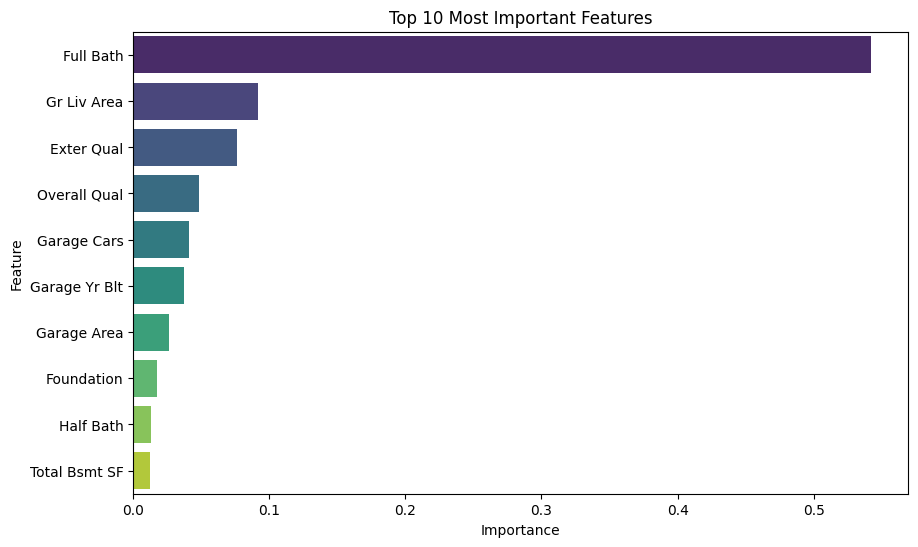

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df[:10], palette="viridis")
plt.title("Top 10 Most Important Features")
plt.show()

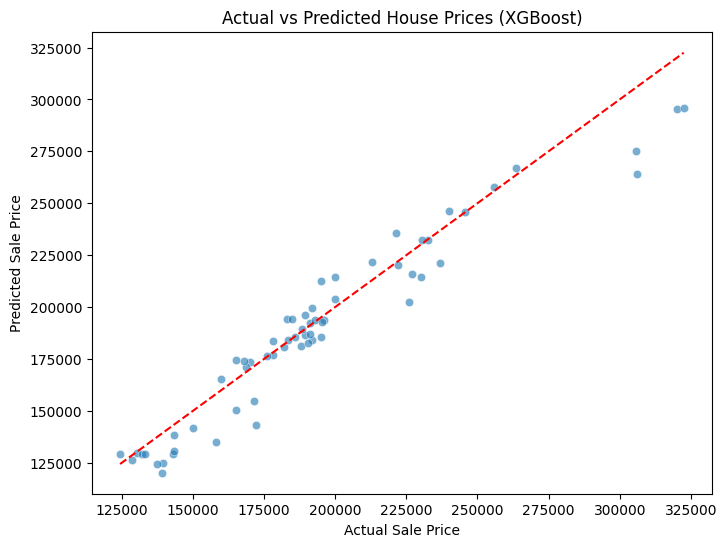

In [ ]:
# Scatter plot for predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices (XGBoost)")
plt.show()

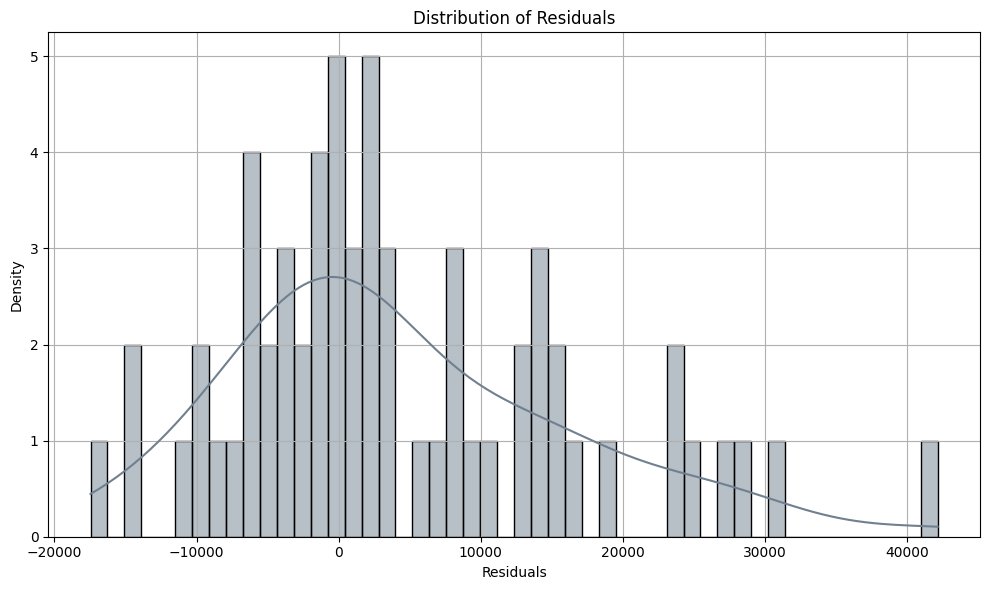

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_xgb

# Plot histogram with KDE curve of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='slategray')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()
